<a href="https://colab.research.google.com/github/e71828/dig/blob/main/dig1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
d = pd.read_csv('StudentsPerformance.csv')
d.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
print(d.index) #  index
print(d.columns) # first row
d.dropna(inplace=True, how='any')
print(d.index)

RangeIndex(start=0, stop=1000, step=1)
Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')
Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            990, 991, 992, 993, 994, 995, 996, 997, 998, 999],
           dtype='int64', length=1000)


In [4]:
d.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


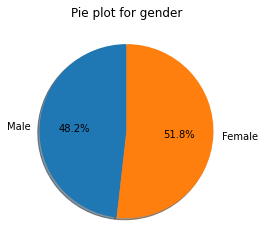

In [5]:
#  pandas count same values in column
#  https://stackoverflow.com/questions/22391433/count-the-frequency-that-a-value-occurs-in-a-dataframe-column
gd = d.groupby('gender').count()
female_count = gd.loc['female','lunch']
male_count = gd.loc['male','lunch']

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Male', 'Female'
sizes = [male_count, female_count]
explode = (0, 0,)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.set(aspect="equal", title='Pie plot for gender')
plt.show()

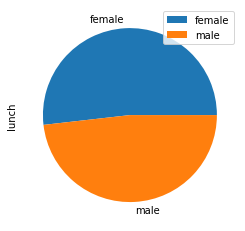

In [6]:
ax = gd.plot.pie(y='lunch')

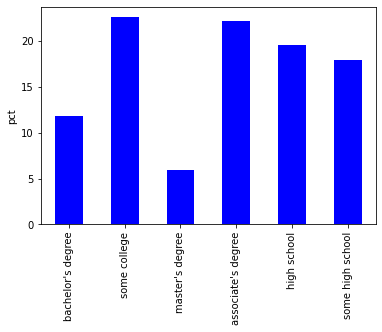

In [7]:
ed = d.groupby('parental level of education').count()
# ax1 = ed.plot.bar(y='lunch')
# plt.show()

edc = d['parental level of education'].value_counts(sort=False, normalize=True).mul(100)
ax2 = edc.plot.bar(color="b")
ax2.set_ylabel("pct")
plt.show()

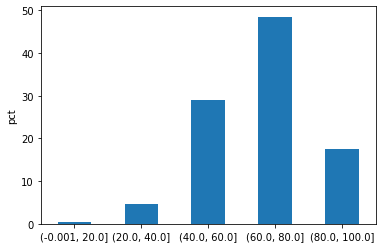

In [8]:
ecut = pd.cut(d['math score'], bins=[0, 20, 40, 60, 80, 100], include_lowest=True)
ecutc = ecut.value_counts(sort=False, normalize=True).mul(100)
ax = ecutc.plot.bar(rot=0)
plt.ylabel("pct")
plt.show()

In [9]:
reg  = d.groupby(['race/ethnicity','parental level of education']).count()
reg = reg['lunch'].unstack('parental level of education')
reg

parental level of education,associate's degree,bachelor's degree,high school,master's degree,some college,some high school
race/ethnicity,,,,,,
group A,14,12,18,3,18,24
group B,41,20,48,6,37,38
group C,78,40,64,19,69,49
group D,50,28,44,23,67,50
group E,39,18,22,8,35,18


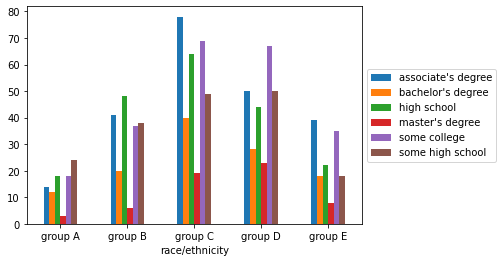

In [10]:
ax = reg.plot.bar(rot=0)
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [11]:
pass3 = ((d['math score']>=60) & (d['reading score']>=60) & (d['writing score']>=60)).sum()
pass2 = ((d['math score']>=60) & (d['reading score']>=60) & (d['writing score']< 60)).sum() + \
        ((d['math score']>=60) & (d['reading score']< 60) & (d['writing score']>=60)).sum() + \
        ((d['math score']< 60) & (d['reading score']>=60) & (d['writing score']>=60)).sum()
pass1 = ((d['math score']>=60) & (d['reading score']< 60) & (d['writing score']< 60)).sum() + \
        ((d['math score']< 60) & (d['reading score']>=60) & (d['writing score']< 60)).sum() + \
        ((d['math score']< 60) & (d['reading score']< 60) & (d['writing score']>=60)).sum()
pass0 = ((d['math score']< 60) & (d['reading score']< 60) & (d['writing score']< 60)).sum()
pass0 + pass1 + pass2 + pass3

1000

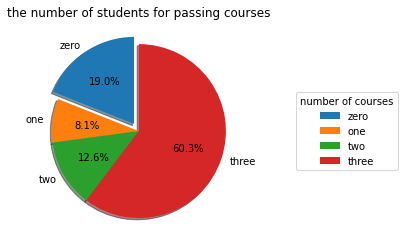

In [12]:
# df = pd.DataFrame({'passed': [pass0, pass1 , pass2, pass3]}, index=['zero', 'one', 'two', 'three'])
fig1, ax1 = plt.subplots()
wedges, texts, autotexts = ax1.pie([pass0, pass1 , pass2, pass3], explode=[0.1, 0, 0, 0], labels=['zero', 'one', 'two', 'three'], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.set(aspect="equal", title='the number of students for passing courses')
ax1.legend(wedges, ['zero', 'one', 'two', 'three'],
          title="number of courses",
          loc="center left",
          bbox_to_anchor=(1.2, 0, 0, 1))
plt.show()

In [13]:
def grade(score):
    if score >=0 and score <=100:
        if score < 60:
            return 'F'
        elif score < 70:
            return 'D'
        elif score < 80:
            return 'C'
        elif score < 90:
            return 'B'
        else:
            return 'A'
    else:
         return 'Nan'

d['grade'] = d['reading score'].apply(grade)
d.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,grade
0,female,group B,bachelor's degree,standard,none,72,72,74,C
1,female,group C,some college,standard,completed,69,90,88,A
2,female,group B,master's degree,standard,none,90,95,93,A
3,male,group A,associate's degree,free/reduced,none,47,57,44,F
4,male,group C,some college,standard,none,76,78,75,C


In [14]:
ggd  = d.groupby(['gender','grade']).count()
ggd = ggd['lunch'].unstack('grade')
print(ggd)

grade    A    B    C    D    F
gender                        
female  64  103  151  109   91
male    15   67  113  124  163


In [15]:
vals = ggd.to_numpy().T
grade = ggd.columns.to_list()
gender = [ggd.index.to_list()[0][0],ggd.index.to_list()[1][0]]

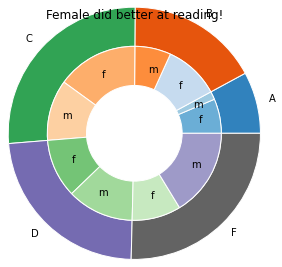

In [16]:
fig, ax = plt.subplots()

size = 0.45
# vals = np.array([[60., 32.], [37., 40.], [29., 10.]])

cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(5)*4)
inner_colors = cmap(np.array([1, 2, 3, 5, 6, 7, 9, 10, 11, 13, 14, 15]))

ax.pie(vals.sum(axis=1), radius=1+size, colors=outer_colors, labels=grade,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.pie(vals.flatten(), radius=1, colors=inner_colors, labels=gender*5, labeldistance=0.75,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.set(aspect="equal", title='Female did better at reading!')
plt.show()